## Boston 주택 가격 예측 모델

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

65536/57026 [==================================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow import keras
from tensorflow.keras import layers, models
# 모델 정의
model = models.Sequential()
model.add(keras.Input(shape=(train_data.shape[1],), name='input'))
model.add(layers.Dense(64, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(1, name='output'))

# 모델 컴파일
model.compile(optimizer='rmsprop',   # 옵티마이저
              loss='mse',            # 손실 함수
              metrics=['mae'])       # 평가 지표

# 모델 요약 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 64)                896       
_________________________________________________________________
dense2 (Dense)               (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/60
11/11 [==============================] - 11s 15ms/step - loss: 531.3098 - mae: 21.1283 - val_loss: 558.3767 - val_mae: 21.7999
Epoch 2/60
11/11 [==============================] - 0s 4ms/step - loss: 463.4110 - mae: 19.4768 - val_loss: 479.1434 - val_mae: 20.0050
Epoch 3/60
11/11 [==============================] - 0s 4ms/step - loss: 386.9808 - mae: 17.5382 - val_loss: 392.1399 - val_mae: 17.9016
Epoch 4/60
11/11 [==============================] - 0s 4ms/step - loss: 304.8007 - mae: 15.2903 - val_loss: 292.6533 - val_mae: 15.1976
Epoch 5/60
11/11 [==============================] - 0s 4ms/step - loss: 218.5197 - mae: 12.7163 - val_loss: 209.4953 - val_mae: 12.4789
Epoch 6/60
11/11 [==============================] - 0s 4ms/step - loss: 148.7975 - mae: 10.2108 - val_loss: 135.0483 - val_mae: 9.4351
Epoch 7/60
11/11 [==============================] - 0s 4ms/step - loss: 95.3913 - mae: 7.8966 - val_loss: 88.7353 - val_mae: 7.2184
Epoch 8/60
11/11 [==============================] -

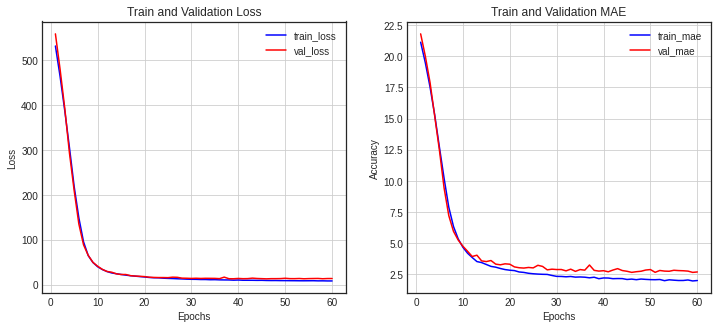

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_mae = model.evaluate(test_data, test_labels)

print(f"Test Loss: {test_loss:.3f}")
print(f"Test MAE: {test_mae:.3f}")

4/4 [==============================] - 0s 2ms/step - loss: 24.1383 - mae: 3.1834
Test Loss: 24.138
Test MAE: 3.183


## Reuters 딥러닝 모델

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [10]:
from tensorflow.keras.utils import to_categorical
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dimension=10000):
    results = np.zeros((len(data), dimension))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

In [17]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))  # 46개의 주제 분류를 위한 출력층

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)               

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50
106/106 [==============================] - 2s 9ms/step - loss: 2.7117 - accuracy: 0.4243 - val_loss: 2.4446 - val_accuracy: 0.6687
Epoch 2/50
106/106 [==============================] - 1s 5ms/step - loss: 1.5719 - accuracy: 0.6658 - val_loss: 1.5104 - val_accuracy: 0.7177
Epoch 3/50
106/106 [==============================] - 1s 5ms/step - loss: 1.2146 - accuracy: 0.7271 - val_loss: 1.2041 - val_accuracy: 0.7480
Epoch 4/50
106/106 [==============================] - 1s 5ms/step - loss: 1.0632 - accuracy: 0.7599 - val_loss: 1.0922 - val_accuracy: 0.7734
Epoch 5/50
106/106 [==============================] - 1s 5ms/step - loss: 0.9145 - accuracy: 0.7859 - val_loss: 1.0624 - val_accuracy: 0.7734
Epoch 6/50
106/106 [==============================] - 1s 5ms/step - loss: 0.7934 - accuracy: 0.8107 - val_loss: 1.0765 - val_accuracy: 0.7796
Epoch 7/50
106/106 [==============================] - 1s 5ms/step - loss: 0.7332 - accuracy: 0.8254 - val_loss: 1.0322 - val_accuracy: 0.7903
Epoch 

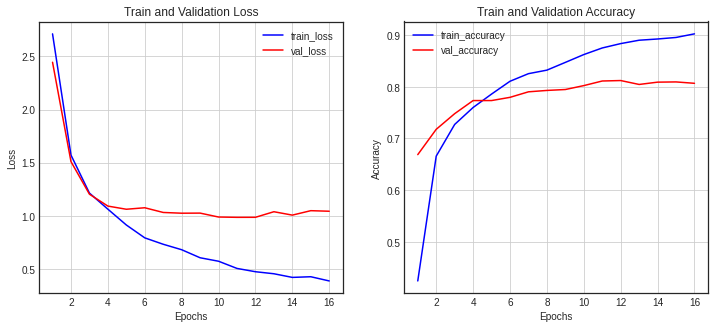

In [20]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [23]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")

71/71 [==============================] - 0s 2ms/step - loss: 1.1340 - accuracy: 0.7930
Test Accuracy: 0.7930


## CIFAR10 딥러닝 모델

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [25]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [26]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

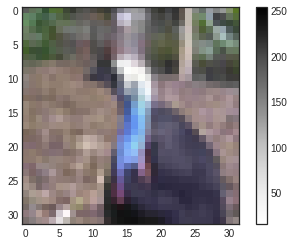

In [28]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.....1로 할게요
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.show()

저...개구리 공포증 있는데....코드 돌렸다가 소리질렀어요....
저한테 왜그러세요...ㅜㅠㅠ

In [29]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [30]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [31]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = Sequential([
    Dense(512, activation='relu', input_shape=(32 * 32 * 3,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)              

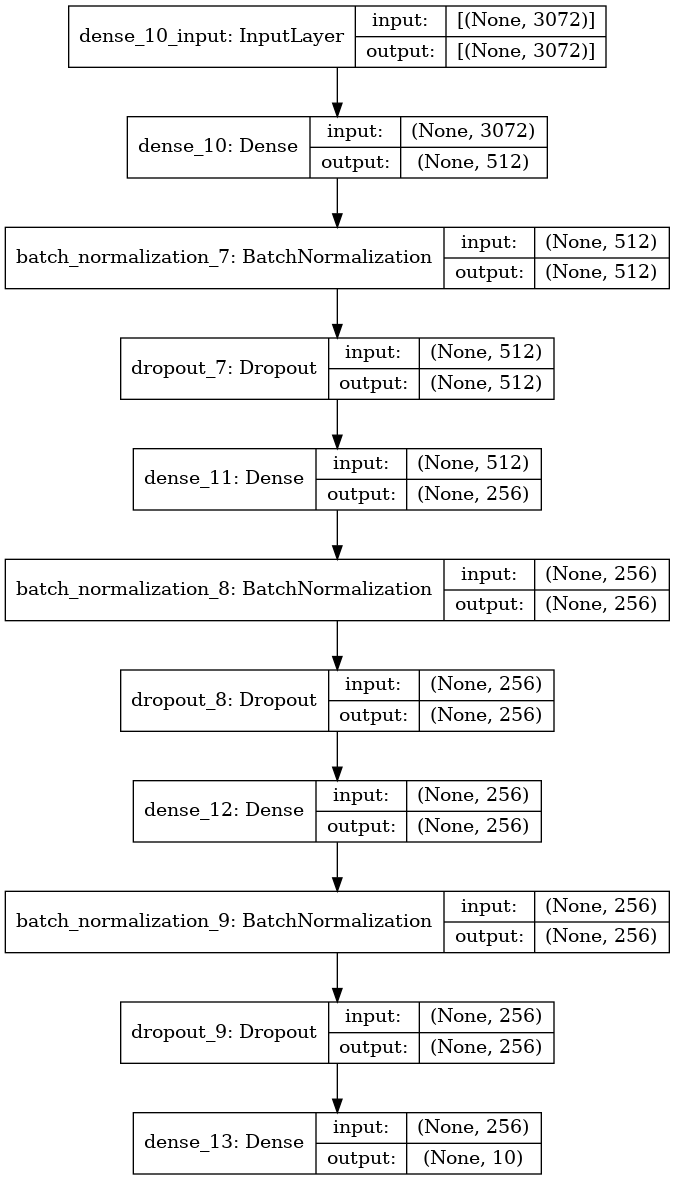

In [40]:
utils.plot_model(model, show_shapes=True)

In [41]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_cifar10_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping])

Epoch 1/100
625/625 [==============================] - 3s 4ms/step - loss: 2.2813 - accuracy: 0.2503 - val_loss: 1.8407 - val_accuracy: 0.3291
Epoch 2/100
625/625 [==============================] - 2s 4ms/step - loss: 1.8732 - accuracy: 0.3251 - val_loss: 1.8095 - val_accuracy: 0.3509
Epoch 3/100
625/625 [==============================] - 2s 4ms/step - loss: 1.8317 - accuracy: 0.3430 - val_loss: 1.7760 - val_accuracy: 0.3588
Epoch 4/100
625/625 [==============================] - 2s 4ms/step - loss: 1.8062 - accuracy: 0.3489 - val_loss: 1.7032 - val_accuracy: 0.3856
Epoch 5/100
625/625 [==============================] - 2s 4ms/step - loss: 1.8009 - accuracy: 0.3512 - val_loss: 1.7173 - val_accuracy: 0.3764
Epoch 6/100
625/625 [==============================] - 2s 4ms/step - loss: 1.8062 - accuracy: 0.3512 - val_loss: 1.7298 - val_accuracy: 0.3803
Epoch 7/100
625/625 [==============================] - 2s 4ms/step - loss: 1.7842 - accuracy: 0.3580 - val_loss: 1.7176 - val_accuracy: 0.3784

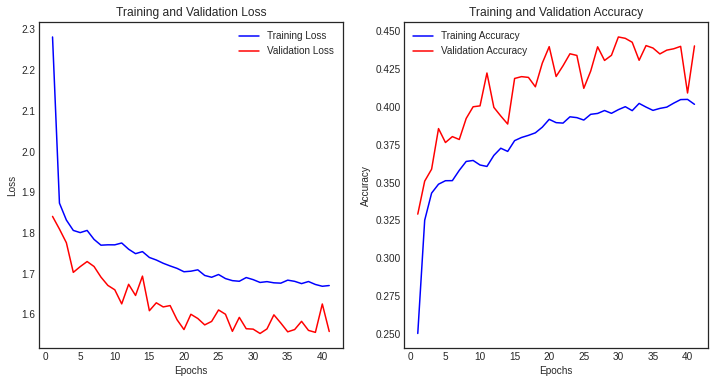

In [42]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='Training Loss')
ax1.plot(epochs, val_loss, 'r-', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='Training Accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [43]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5470 - accuracy: 0.4497


[1.5470064878463745, 0.4496999979019165]